In [ ]:
import nltk
nltk.download('book', quiet= True)

True

In [ ]:
!unzip -q Bhagavad_Gita_text_only.zip

In [ ]:
BGita = nltk.corpus.reader.TaggedCorpusReader('Bhagavad_Gita_text_only', r'.*\.txt')


In [ ]:
!unzip -q bible_text_only.zip
bible = nltk.corpus.reader.TaggedCorpusReader('bible_text_only', r'.*\.txt')

In [ ]:
!unzip -q quran_text_only.zip
quran = nltk.corpus.reader.TaggedCorpusReader('quran_text_only', r'.*\.txt')

In [ ]:
words_bg = list(iter(BGita.words()))
words_bible = list(iter(bible.words()))
words_quran = list(iter(quran.words()))

In [ ]:
total_words_bg = len(words_bg)
total_words_bg

22603

In [ ]:
total_words_bible = len(words_bible)
total_words_bible

915531

In [ ]:
total_words_quran = len(words_quran)
total_words_quran

174736

In [ ]:
BGita.fileids()

['Chapter1.txt',
 'Chapter10.txt',
 'Chapter11.txt',
 'Chapter12.txt',
 'Chapter13.txt',
 'Chapter14.txt',
 'Chapter15.txt',
 'Chapter16.txt',
 'Chapter17.txt',
 'Chapter18.txt',
 'Chapter2.txt',
 'Chapter3.txt',
 'Chapter4.txt',
 'Chapter5.txt',
 'Chapter6.txt',
 'Chapter7.txt',
 'Chapter8.txt',
 'Chapter9.txt']

In [ ]:
bible.fileids()

['Bib.txt']

In [ ]:
quran.fileids()

['Chapter001.txt',
 'Chapter002.txt',
 'Chapter003.txt',
 'Chapter004.txt',
 'Chapter005.txt',
 'Chapter006.txt',
 'Chapter007.txt',
 'Chapter008.txt',
 'Chapter009.txt',
 'Chapter010.txt',
 'Chapter011.txt',
 'Chapter012.txt',
 'Chapter013.txt',
 'Chapter014.txt',
 'Chapter015.txt',
 'Chapter016.txt',
 'Chapter017.txt',
 'Chapter018.txt',
 'Chapter019.txt',
 'Chapter020.txt',
 'Chapter021.txt',
 'Chapter022.txt',
 'Chapter023.txt',
 'Chapter024.txt',
 'Chapter025.txt',
 'Chapter026.txt',
 'Chapter027.txt',
 'Chapter028.txt',
 'Chapter029.txt',
 'Chapter030.txt',
 'Chapter031.txt',
 'Chapter032.txt',
 'Chapter033.txt',
 'Chapter034.txt',
 'Chapter035.txt',
 'Chapter036.txt',
 'Chapter037.txt',
 'Chapter038.txt',
 'Chapter039.txt',
 'Chapter040.txt',
 'Chapter041.txt',
 'Chapter042.txt',
 'Chapter043.txt',
 'Chapter044.txt',
 'Chapter045.txt',
 'Chapter046.txt',
 'Chapter047.txt',
 'Chapter048.txt',
 'Chapter049.txt',
 'Chapter050.txt',
 'Chapter051.txt',
 'Chapter052.txt',
 'Chapter053

In [ ]:
  import re
  cmudict = nltk.corpus.cmudict.dict()
  def syllables(word):
    if word in cmudict:
      return len([p for p in cmudict[word][0] if p[-1].isdigit()])
    else:
      return len(re.findall(r'[aeiou]+', word))

RE = 206.835 - 84.6w - 1.015s, where w = number of sylllables per 100 words; s = average number of words per sentence.


In this case, the higher the RE score, the easier the text.

In [ ]:
total_syllables_bg = 0

for i in words_bg:
  total_syllables_bg = total_syllables_bg + syllables(i)
total_syllables_bg  

25032

In [ ]:
total_syllables_bible = 0

for i in words_bible:
  total_syllables_bible = total_syllables_bible + syllables(i)
total_syllables_bible

988799

In [ ]:
total_syllables_quran = 0

for i in words_quran:
  total_syllables_quran = total_syllables_quran + syllables(i)
total_syllables_quran

185240

In [ ]:
sents_bg = list(iter(BGita.sents()))

In [ ]:
total_sents_bg = len(sents_bg) 

In [ ]:
sents_bible = list(iter(bible.sents()))
total_sents_bible = len(sents_bible)

In [ ]:
sents_quran = list(iter(quran.sents()))
total_sents_quran = len(sents_quran)

In [ ]:
def RE(words, sents, syllables):
  return (206.865 - (1.015*(words/sents)) - 84.6*(syllables/words))

RE_bg = RE(total_words_bg, total_sents_bg, total_syllables_bg)
RE_bible = RE(total_words_bible, total_sents_bible, total_syllables_bible)
RE_quran = RE(total_words_quran, total_sents_quran, total_syllables_quran)


In [ ]:
print(RE_bg)
print(RE_bible)
print(RE_quran)

85.66513126507158
88.98136140699289
106.59786335132912


In [ ]:
words_bg = [w for w in words_bg[:10000] if(w.isalpha())]
words_bible = [w for w in words_bible[:10000] if(w.isalpha())]
words_quran = [w for w in words_quran[:10000] if(w.isalpha())]

In [ ]:
len_words_bg = []
for i in words_bg:
  len_words_bg.append(len(i))
freq_bg = nltk.FreqDist(len_words_bg)

len_words_bible = []
for i in words_bible:
  len_words_bible.append(len(i))
freq_bible = nltk.FreqDist(len_words_bible)

len_words_quran = []
for i in words_quran:
  len_words_quran.append(len(i))
freq_quran = nltk.FreqDist(len_words_quran)

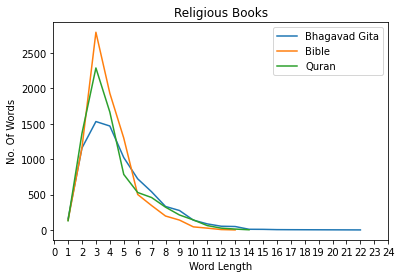

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(*zip(*sorted(dict(freq_bg).items())), label = "Bhagavad Gita")
plt.plot(*zip(*sorted(dict(freq_bible).items())), label = "Bible")
plt.plot(*zip(*sorted(dict(freq_quran).items())), label = "Quran")

plt.xlabel("Word Length")
plt.ylabel("No. Of Words")
plt.title("Religious Books")

plt.xticks(np.arange(0,25,1))
plt.legend()
plt.show() 